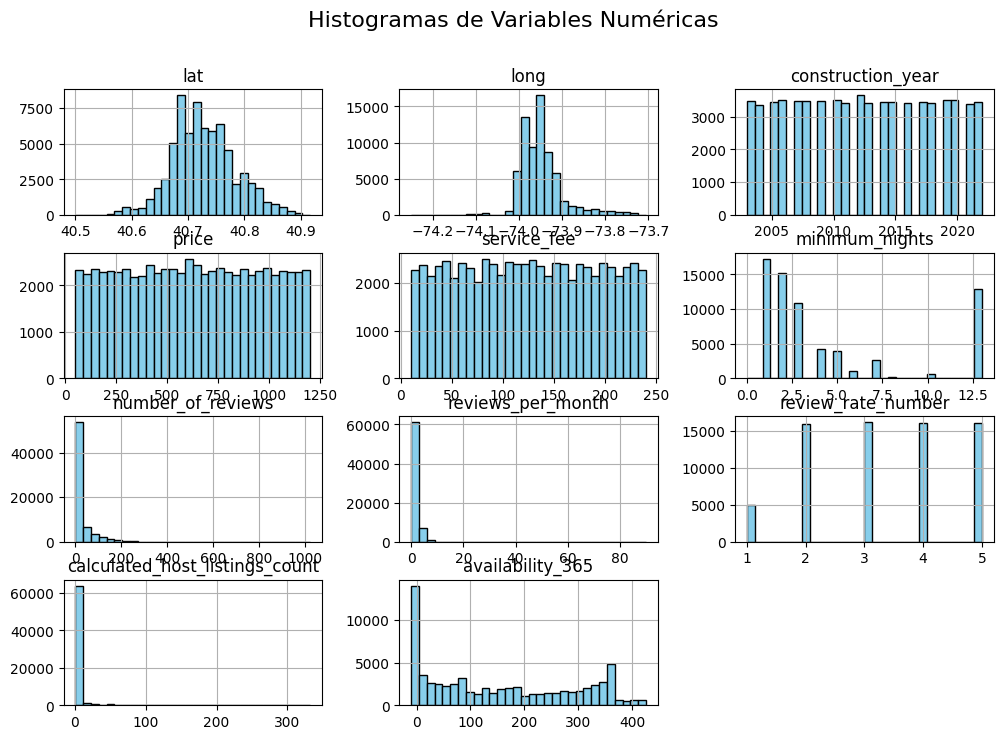

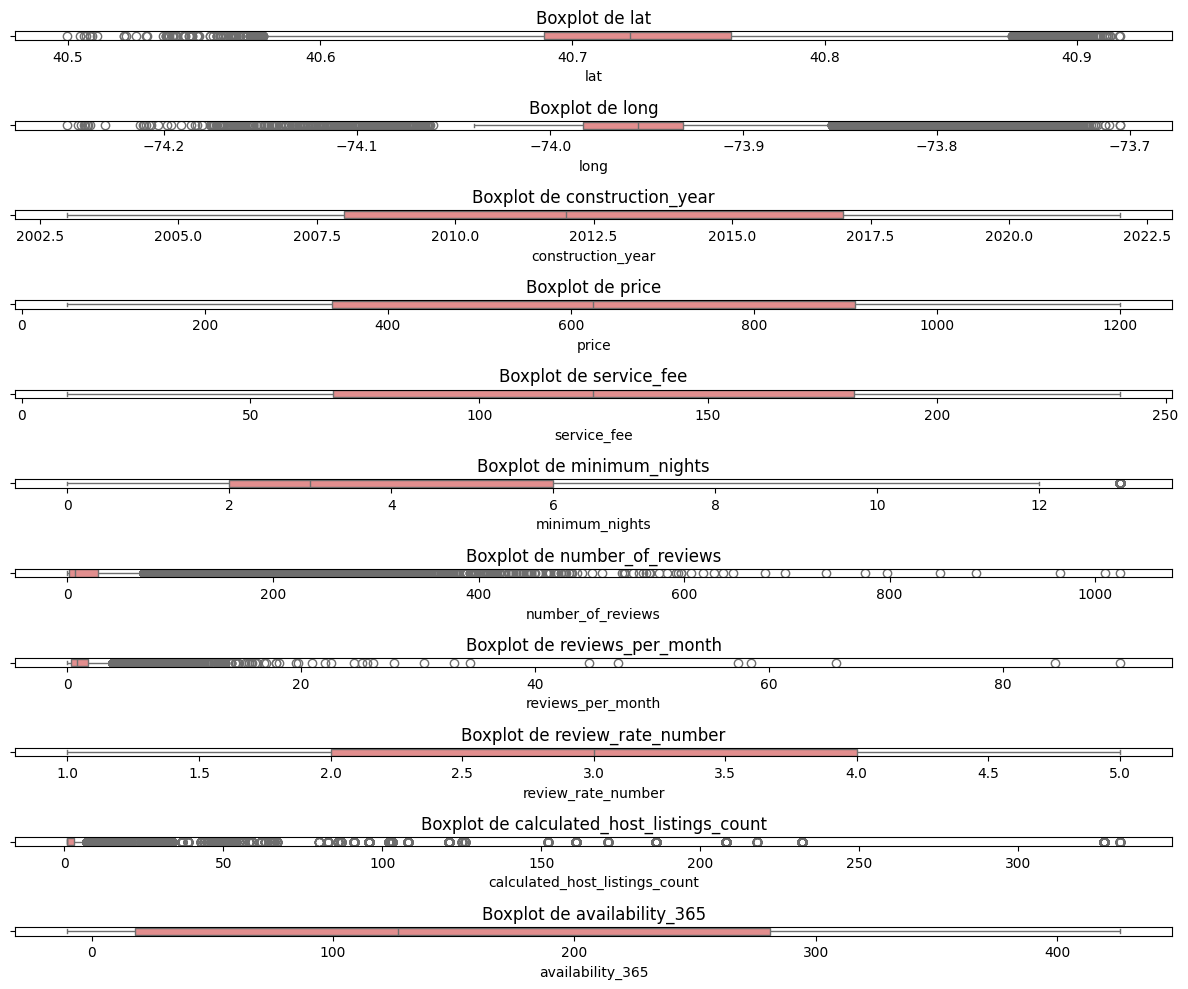

C:\Users\carol\AppData\Local\Temp\ipykernel_9832\1346790006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', ax=axes[i])


KeyboardInterrupt: 

C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.on\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 38748 (\N{CJK UNIFIED IDEOGRAPH-975C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\

Error in callback <function _draw_all_if_interactive at 0x0000022C27445080> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
Dominiq's NY cosy 3bedrm crashpad*metro*wifi*$$ale
                                             ^
ParseException: Expected end of text, found '$'  (at char 45), (line:1, col:46)

C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from font(s) DejaVu Sans.on\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38748 (\N{CJK UNIFIED IDEOGRAPH-975C}) missing from font(s) DejaVu San

ValueError: 
Dominiq's NY cosy 3bedrm crashpad*metro*wifi*$$ale
                                             ^
ParseException: Expected end of text, found '$'  (at char 45), (line:1, col:46)

<Figure size 1200x1200 with 7 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset después de limpieza previa
file_path = "../Data/airbnb_nyc_clean.csv"
df = pd.read_csv(file_path)

# Eliminar columnas irrelevantes
df.drop(columns=['id', 'host_id', 'host_name'], inplace=True, errors='ignore')

# Convertir la columna de fecha a datetime y extraer componentes
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['review_year'] = df['last_review'].dt.year
df['review_month'] = df['last_review'].dt.month
df['review_day'] = df['last_review'].dt.day

# Eliminar la columna original de fecha si no se necesita
df.drop(columns=['last_review'], inplace=True, errors='ignore')

# Seleccionar columnas numéricas y categóricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# --- Análisis Univariante ---
# Histogramas de variables numéricas
df[numerical_columns].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.show()

# Boxplots para variables numéricas
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(12, 10))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], color='lightcoral', ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# Countplots para variables categóricas
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 12))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, palette='pastel', ax=axes[i])
    axes[i].set_title(f"Frecuencia de {col}")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# --- Análisis Bivariante ---
# Scatterplots de variables numéricas relevantes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=df, x='latitude', y='longitude', hue='price', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("Distribución Geográfica de Precios")

sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Precio vs Noches Mínimas")

sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Precio vs Número de Reseñas")

sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Precio vs Disponibilidad Anual")

plt.tight_layout()
plt.show()

# --- Análisis Multivariante ---
# Heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.show()

# Pairplot de variables numéricas clave
sns.pairplot(df, vars=['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], hue='neighbourhood_group', palette='coolwarm')
plt.suptitle("Pairplot de Variables Clave con Coloreado por Barrio", y=1.02)
plt.show()
